In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('international-airline-passengers.csv', usecols = [1])

In [3]:
df

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [4]:
values = df.values.astype('float32')

In [5]:
train_size = int(values.shape[0] * (2/3))
test_size = values.shape[0] - train_size

train_data = values[:train_size]
test_data = values[train_size:]

In [6]:
scaler = MinMaxScaler(feature_range = (0, 1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [7]:
def create_dataset(data, look_back):
  X_data, Y_data = [], []
  for i in range(data.shape[0] - look_back):
    X = data[i:i+look_back, 0]
    Y = data[i+look_back, 0]
    X_data.append(X)
    Y_data.append(Y)
  return np.array(X_data), np.array(Y_data)

In [8]:
look_back = 12
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

In [9]:
X_train = X_train.reshape(-1, look_back, 1)
X_test = X_test.reshape(-1, look_back, 1)
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

In [10]:
model = Sequential()
model.add(SimpleRNN(4, input_shape = (look_back, 1)))
model.add(Dense(1))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 4)                 24        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])
model.fit(X_train, Y_train, epochs = 100, batch_size = 1)

Epoch 1/100
84/84 [==============================] - 1s 3ms/step - loss: 0.3799 - root_mean_squared_error: 0.6164
Epoch 2/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0920 - root_mean_squared_error: 0.3034
Epoch 3/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0629 - root_mean_squared_error: 0.2508
Epoch 4/100
84/84 [==============================] - 0s 3ms/step - loss: 0.0457 - root_mean_squared_error: 0.2139
Epoch 5/100
84/84 [==============================] - 0s 4ms/step - loss: 0.0334 - root_mean_squared_error: 0.1828
Epoch 6/100
84/84 [==============================] - 0s 5ms/step - loss: 0.0258 - root_mean_squared_error: 0.1605
Epoch 7/100
84/84 [==============================] - 0s 5ms/step - loss: 0.0204 - root_mean_squared_error: 0.1429
Epoch 8/100
84/84 [==============================] - 0s 6ms/step - loss: 0.0166 - root_mean_squared_error: 0.1290
Epoch 9/100
84/84 [==============================] - 1s 6ms/step - loss: 0.0150 - root_m

In [13]:
model.evaluate(X_test, Y_test, batch_size = 1)

36/36 [==============================] - 0s 2ms/step - loss: 0.0230 - root_mean_squared_error: 0.1517


[0.02302224189043045, 0.15173082053661346]

In [14]:
Y_train_preds = model.predict(X_train)
Y_train_preds = scaler.inverse_transform(Y_train_preds).ravel()

Y_train_true = scaler.inverse_transform(Y_train).ravel()

Y_test_preds = model.predict(X_test)
Y_test_preds = scaler.inverse_transform(Y_test_preds).ravel()

Y_test_true = scaler.inverse_transform(Y_test).ravel()

In [15]:
Y_true_combined = np.concatenate((Y_train_true, Y_test_true))
Y_preds_combined = np.concatenate((Y_train_preds, Y_test_preds))

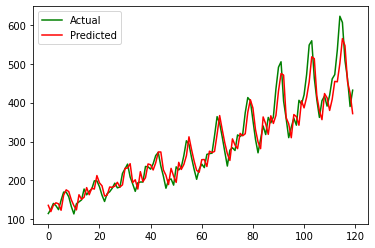

In [16]:
plt.plot(Y_true_combined, c = 'g', label = 'Actual')
plt.plot(Y_preds_combined, c = 'r', label = 'Predicted')
plt.legend()
plt.show()